In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from plotly.graph_objs import *
import plotly.express as px 
import sqlite3


In [2]:
data=pd.read_csv("insurance.csv")
data.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
print(data.info())
print("-"*25)
print("shape of data :",np.shape(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
-------------------------
shape of data : (1338, 7)


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
# get Types of data:

data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in age -->> 
 age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
-------------------------
counts of items in sex -->> 
 sex
male      676
female    662
Name: count, dtype: int64
-------------------------
counts of items in bmi -->> 
 bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
-------------------------
counts of items in children -->> 
 children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
-----------

In [7]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>age column  :  
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
**************************************************
All items in the ---->>>sex column  :  
['female' 'male']
**************************************************
All items in the ---->>>bmi column  :  
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  2

In [8]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['sex', 'smoker', 'region'], dtype='object')
 Numerical_columns ----->>> Index(['age', 'bmi', 'children', 'charges'], dtype='object') 
 Discrete_columns ---->>> Index(['age', 'children'], dtype='object') 
 Continous_cols ----->> Index(['bmi', 'charges'], dtype='object') 
 Nominal Columns --->> sex       2
smoker    2
dtype: int64


In [9]:
# Describe object :
data.describe(include="O").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


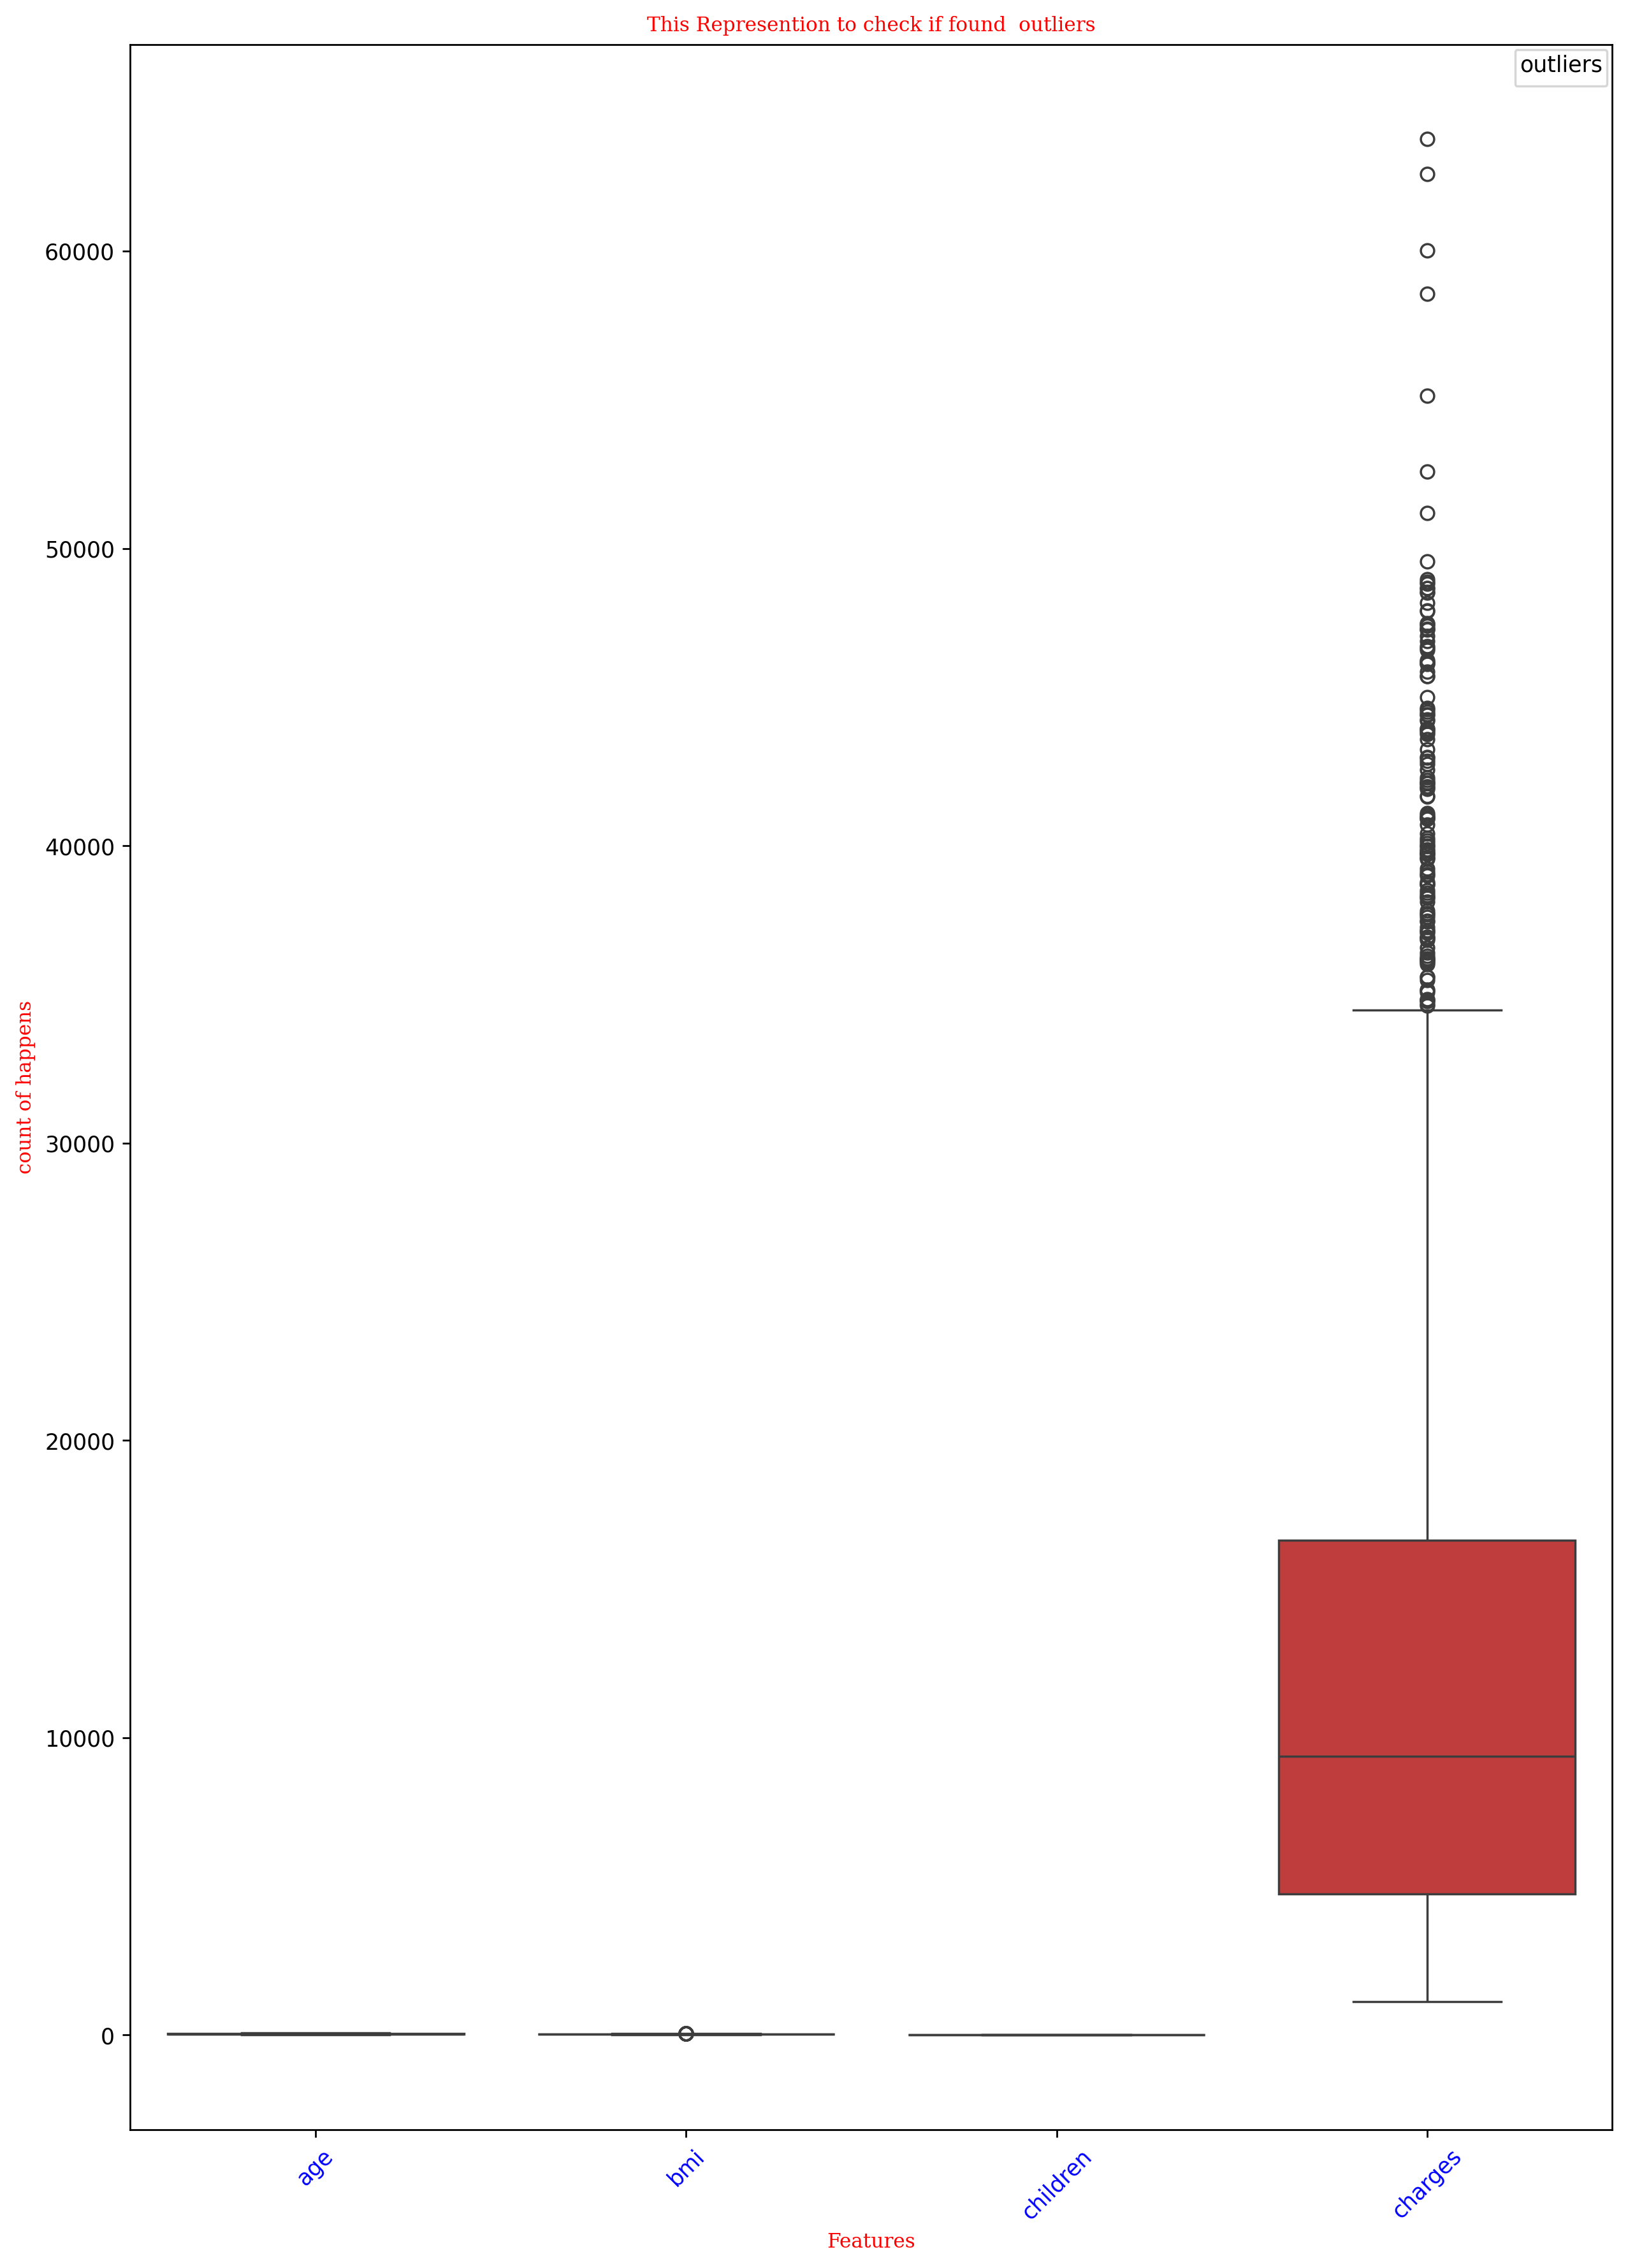

In [10]:
features=data.select_dtypes(include="number").columns
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(12,17),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data)
plt.legend(title="outliers",prop={'size': 5})

In [11]:
data["age"].astype('float')

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float64

In [12]:
num=data.select_dtypes(include=["number"])
scaler=MinMaxScaler()
scaler=scaler.fit_transform(num)
scaler

array([[0.02173913, 0.3212268 , 0.        , 0.25161076],
       [0.        , 0.47914985, 0.2       , 0.00963595],
       [0.2173913 , 0.45843422, 0.6       , 0.05311516],
       ...,
       [0.        , 0.56201238, 0.        , 0.00810808],
       [0.06521739, 0.26472962, 0.        , 0.01414352],
       [0.93478261, 0.35270379, 0.        , 0.44724873]])

In [13]:
scaled_numerical_df = pd.DataFrame(scaler, columns=num.columns)

scaled_numerical_df

,age,bmi,children,charges
0,0.021739,0.321227,0.0,0.251611
1,0.000000,0.479150,0.2,0.009636
2,0.217391,0.458434,0.6,0.053115
3,0.326087,0.181464,0.0,0.333010
4,0.304348,0.347592,0.0,0.043816
...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299
1334,0.000000,0.429379,0.0,0.017305
1335,0.000000,0.562012,0.0,0.008108
1336,0.065217,0.264730,0.0,0.014144


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


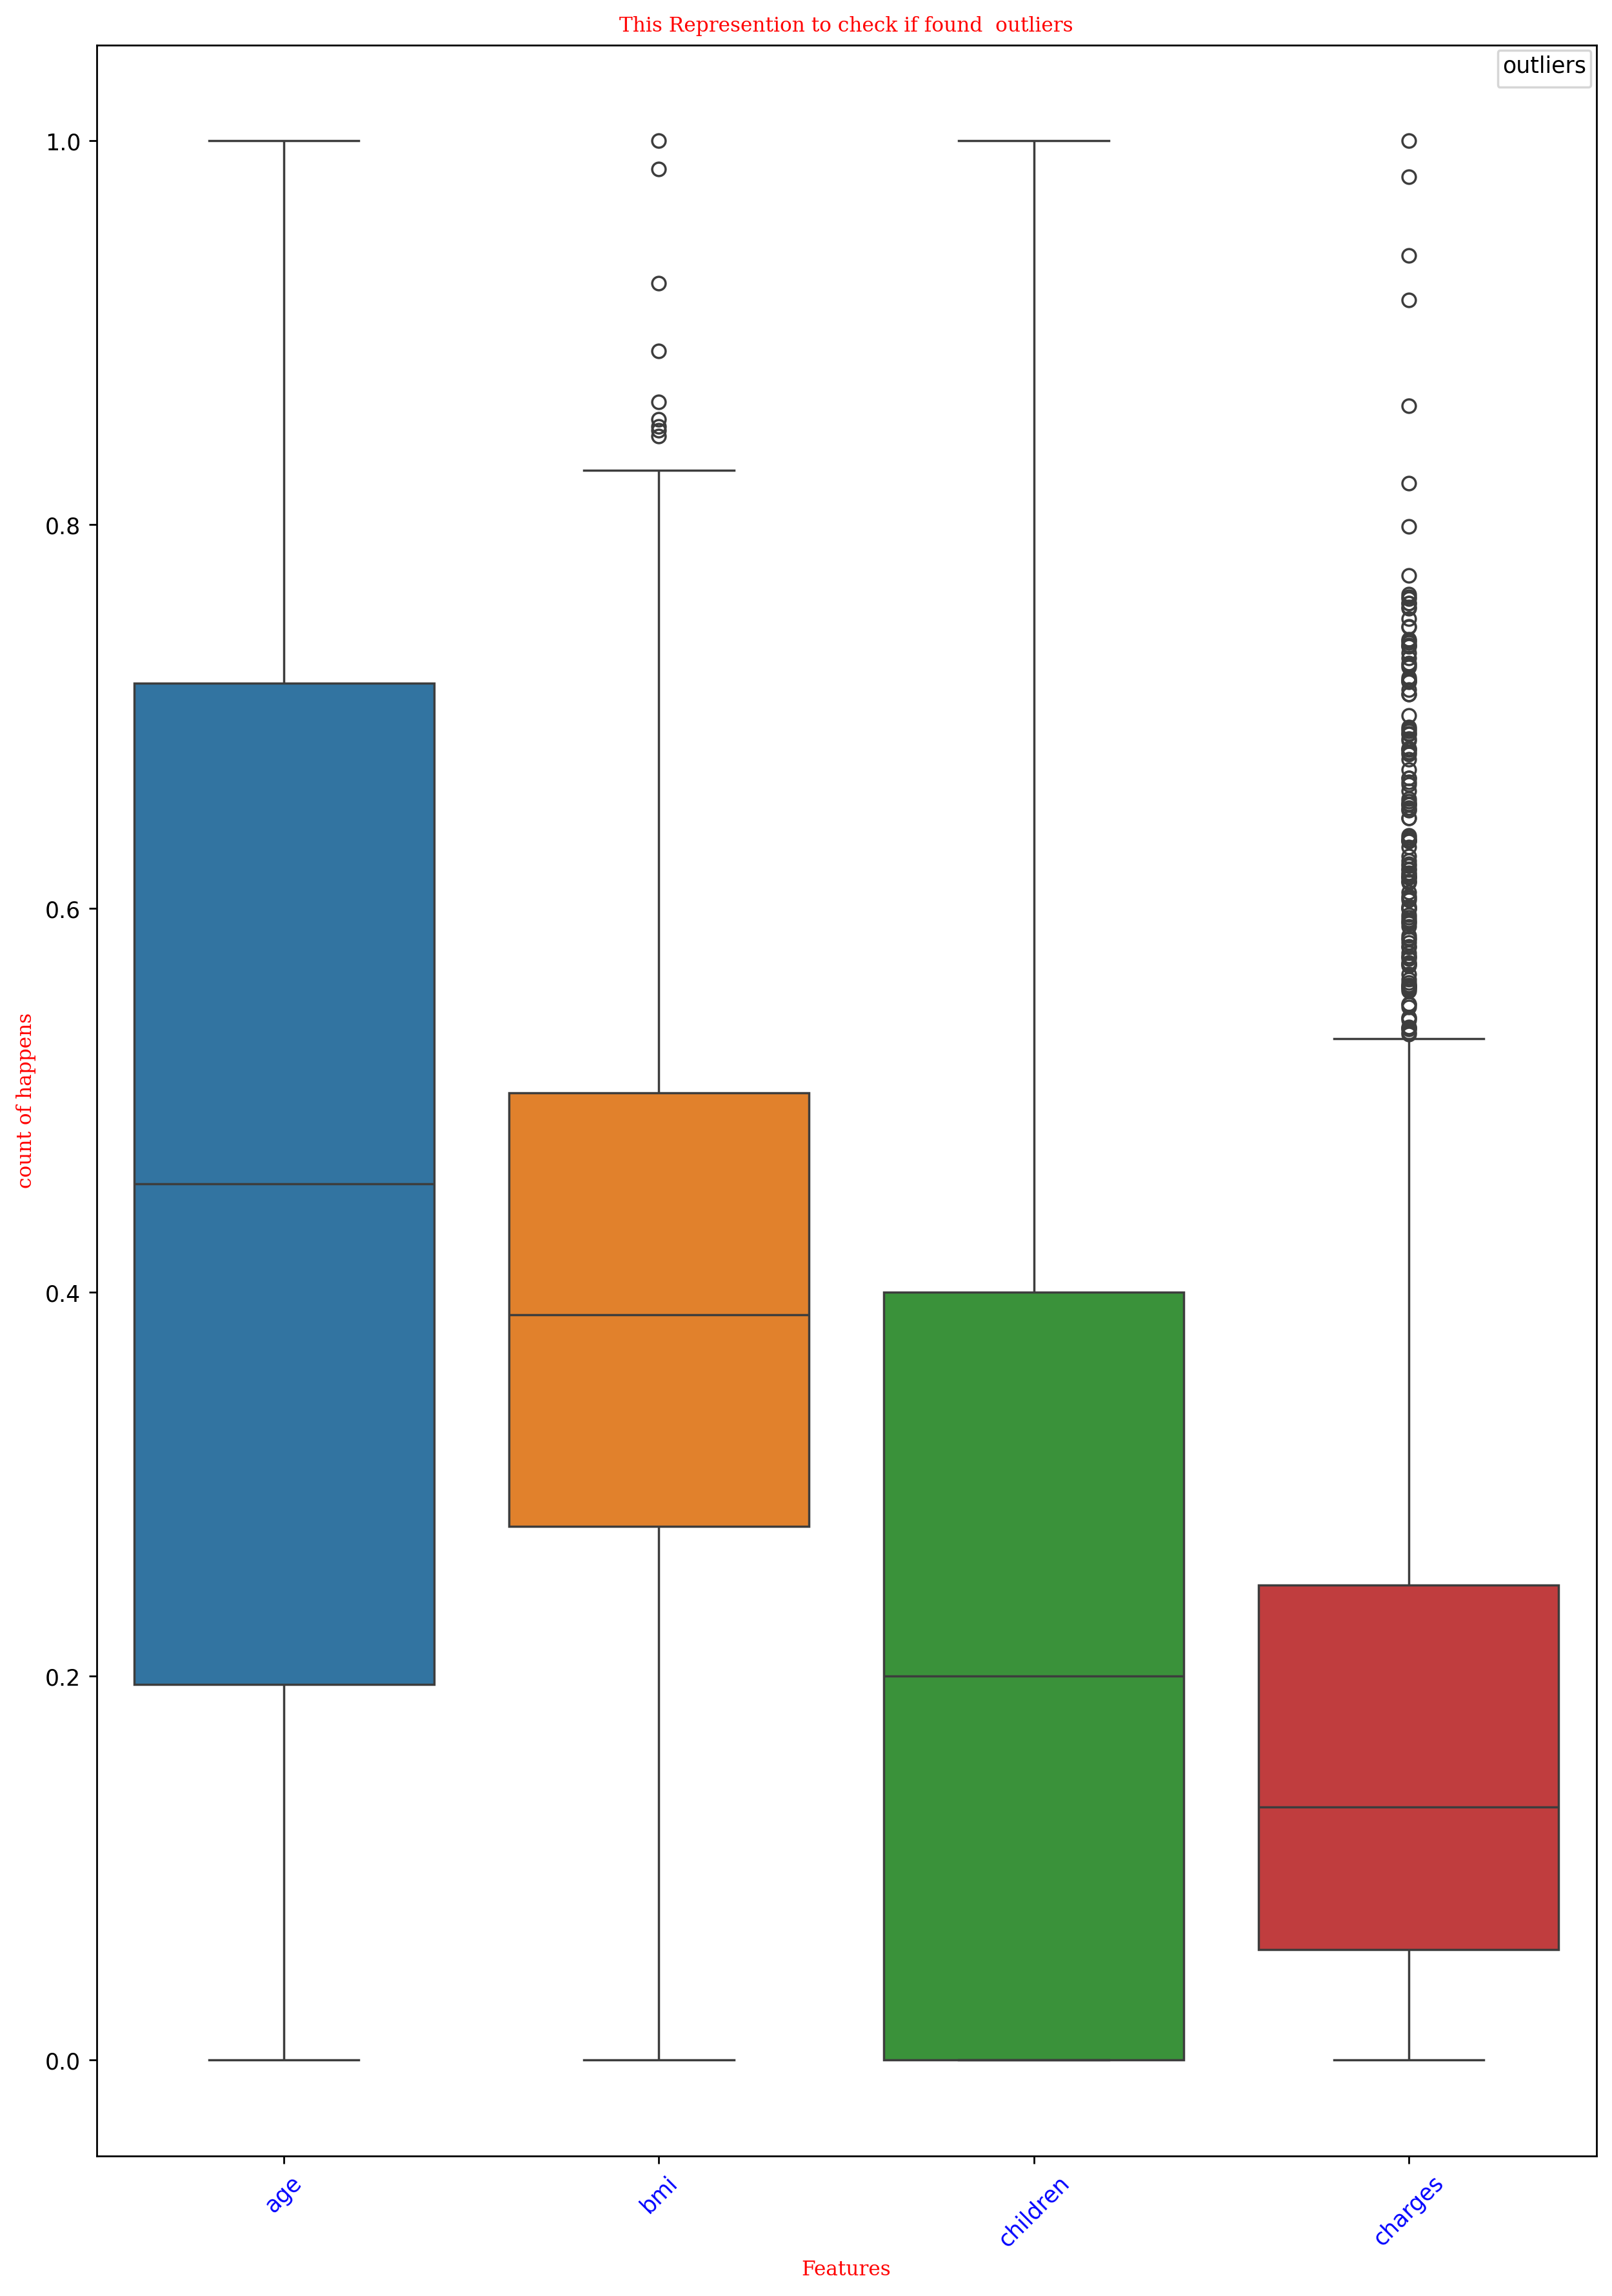

In [14]:
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(12,17),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(scaled_numerical_df)
plt.legend(title="outliers",prop={'size': 5})

In [27]:
scaled_data_without_outliers = scaled_numerical_df[scaled_numerical_df['charges'] <= 0.2]
scaled_data_without_outliers

,age,bmi,children,charges
1,0.000000,0.479150,0.2,0.009636
2,0.217391,0.458434,0.6,0.053115
4,0.304348,0.347592,0.0,0.043816
5,0.282609,0.263115,0.0,0.042056
6,0.608696,0.470272,0.2,0.113629
...,...,...,...,...
1332,0.739130,0.773204,0.6,0.164247
1333,0.695652,0.403820,0.6,0.151299
1334,0.000000,0.429379,0.0,0.017305
1335,0.000000,0.562012,0.0,0.008108


In [28]:
data.isna().mean()

age                 0.0
bmi                 0.0
children            0.0
charges             0.0
sex_female          0.0
sex_male            0.0
smoker_no           0.0
smoker_yes          0.0
region_northeast    0.0
region_northwest    0.0
region_southeast    0.0
region_southwest    0.0
dtype: float64

In [29]:
data=pd.get_dummies(data)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [30]:
# split the data int train & test :

x=scaled_data_without_outliers.drop(columns="bmi",axis=1)
y=scaled_data_without_outliers["bmi"]

In [31]:
# train split of the Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (747, 3)
x_test shape :  (187, 3)
y_train shape :  (747,)
y_test shape :  (187,)


In [32]:
# instantiate the model
lnreg = LinearRegression()
# fit the model
lnreg.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred_test = lnreg.predict(x_test)

y_pred_test[:10]

array([0.35663604, 0.41314542, 0.4088496 , 0.3803391 , 0.40892095,
       0.40911115, 0.40127653, 0.41961263, 0.36406448, 0.35801608])

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_test, y_test)

# R_square
R_square_sk = lnreg.score(x_test,y_test)
print('MSE',mse)
print('R_square:',R_square_sk)

MSE 0.02788825894982151
R_square: -0.004635090608588577
